In [1]:
import pandas as pd 
import numpy as np 
from matplotlib import pyplot as plt
from sklearn.datasets import make_classification

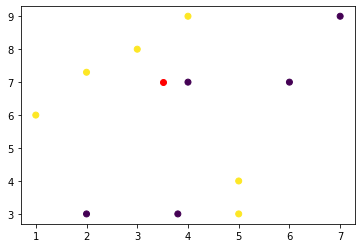

In [2]:
df = pd.DataFrame({
    'x':[1,2,3,4,5,6,7,5,2,3.8,4],
    'y':[6,3,8,9,3,7,9,4,7.3,3,7],
    'z':[1,0,1,1,1,0,0,1,1,0,0]
})
plt.scatter(df['x'],df['y'],c=df['z'])
plt.scatter(3.5,7,color='r')

In [3]:
def ed(x1,x2,z1,z2):
    return np.sqrt((x2-x1)**2 + (z2-z1)**2)
ed(3.5,7,4,7)

4.6097722286464435

In [4]:
ed(3.5,7,3,8)

6.103277807866851

In [5]:
np.argmin([4.6,6.1])

0

# Customer Purchase

In [6]:
df=pd.read_csv('datasets/Social_Network_Ads - Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [7]:
df.drop (columns='User ID',inplace=True)

In [8]:
from sklearn.preprocessing import LabelEncoder,StandardScaler
lb = LabelEncoder()
sc = StandardScaler()
df['Gender']=lb.fit_transform(df['Gender'])
df[['Age','EstimatedSalary']] = sc.fit_transform(df[['Age','EstimatedSalary']])
df               

,Gender,Age,EstimatedSalary,Purchased
0,1,-1.781797,-1.490046,0
1,1,-0.253587,-1.460681,0
2,0,-1.113206,-0.785290,0
3,0,-1.017692,-0.374182,0
4,1,-1.781797,0.183751,0
...,...,...,...,...
395,0,0.797057,-0.844019,1
396,1,1.274623,-1.372587,1
397,0,1.179110,-1.460681,1
398,1,-0.158074,-1.078938,0


In [12]:
ind = df.iloc[:,:3]
dep = df.iloc[:,-1]
dep

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

In [13]:
ind

,Gender,Age,EstimatedSalary
0,1,-1.781797,-1.490046
1,1,-0.253587,-1.460681
2,0,-1.113206,-0.785290
3,0,-1.017692,-0.374182
4,1,-1.781797,0.183751
...,...,...,...
395,0,0.797057,-0.844019
396,1,1.274623,-1.372587
397,0,1.179110,-1.460681
398,1,-0.158074,-1.078938


In [14]:
xx = df.iloc
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(ind,dep,test_size=0.2,random_state=0)

In [15]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=2)

In [16]:
testing =pd.DataFrame({
    'y': y_test,
    'y_hat' : knn.predict(x_test)
})
testing.sample(8)

,y,y_hat
6,0,0
313,1,1
154,0,0
371,1,1
10,0,0
322,0,0
297,1,1
294,0,0


In [18]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,knn.predict(x_test))

array([[55,  3],
       [ 3, 19]], dtype=int64)

In [20]:
Accuracy = (55+19)/(55+3+3+19)
print(Accuracy)

0.925
